# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados** 

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [116]:
from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open(NOME_ARQUIVO_FONTE, mode='r'), 'lxml')

In [117]:
fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [118]:
dados = fonte.find_all('estado')
header = ['UF', 'Sigla', 'Região']
conteudo_extraido = []

for linhas in dados: 
    linha = linhas.text.strip().split('\n')
    linha.pop(2)
    linha.pop(0)
    conteudo_extraido.append(linha)
conteudo_extraido.insert(0,header)
print(conteudo_extraido)

[['UF', 'Sigla', 'Região'], ['ACRE', 'AC', 'NORTE'], ['ALAGOAS', 'AL', 'NORDESTE'], ['AMAPA', 'AP', 'NORTE'], ['AMAZONAS', 'AM', 'NORTE'], ['BAHIA', 'BA', 'NORDESTE'], ['CEARA', 'CE', 'NORDESTE'], ['DISTRITO FEDERAL', 'DF', 'CENTRO-OESTE'], ['ESPIRITO SANTO', 'ES', 'SUDESTE'], ['GOIAS', 'GO', 'CENTRO-OESTE'], ['MARANHAO', 'MA', 'NORDESTE'], ['MATO GROSSO', 'MT', 'CENTRO-OESTE'], ['MATO GROSSO DO SUL', 'MS', 'CENTRO-OESTE'], ['PARA', 'PA', 'NORTE'], ['PARAIBA', 'PB', 'NORDESTE'], ['PARANA', 'PR', 'SUL'], ['PERNAMBUCO', 'PE', 'NORDESTE'], ['PIAUI', 'PI', 'NORDESTE'], ['RIO DE JANEIRO', 'RJ', 'SUDESTE'], ['RIO GRANDE DO NORTE', 'RN', 'NORDESTE'], ['RIO GRANDE DO SUL', 'RS', 'SUL'], ['RONDONIA', 'RO', 'NORTE'], ['RORAIMA', 'RR', 'NORTE'], ['SANTA CATARINA', 'SC', 'SUL'], ['SÃO PAULO', 'SP', 'SUDESTE'], ['SERGIPE', 'SE', 'NORDESTE'], ['TOCANTINS', 'TO', 'NORTE'], ['MINAS GERAIS', 'MG', 'SUDESTE']]


In [119]:
import csv

with open(file = './estados-limpo.csv', mode = 'w', encoding = 'utf8') as arquivo:
    escritor_csv = csv.writer(arquivo, delimiter = ',')
    for i in range(28):
         escritor_csv.writerow(conteudo_extraido[i])

### **1.2. Cidades** 

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [120]:
import pandas as pd

!cat ./cidades-bruto.csv

fonte_df = pd.read_csv('./cidades-bruto.csv')


Output hidden; open in https://colab.research.google.com to view.

In [121]:
fonte_df

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [122]:
censo_de_2010 = fonte_df.query('Censo == 2010')
colunas = censo_de_2010[['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']]

In [123]:
colunas.to_csv('./cidades-limpo.csv')

### **1.3. Brasil** 

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [124]:
cidades_df = pd.read_csv('./cidades-limpo.csv', sep=',')
estados_df = pd.read_csv('./estados-limpo.csv', sep=',')

pd.merge(left = cidades_df, right = estados_df, on = 'UF', how = 'inner').to_csv('./brasil.csv')

---

## 2\. Data Analytics

### **2.1. DataFrame** 

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [125]:
import pandas as pd

brasil_df = pd.read_csv('./brasil.csv')

### **2.2. Analise** 

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [ ]:
brasil_df.sort_values(by = ['Pop_est_2009'], ascending = False).head(n=10)

 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [ ]:
brasil_df.query('Região == "NORDESTE"').sort_values(by = ['PIB_percapita'], ascending = True).head(n=5)

 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [135]:
brasil_df.query('UF == "SÃO PAULO"').sort_values(by = ['PIB_percapita'], ascending =False).head(n=15)

,Unnamed: 0,Unnamed: 0.1,UF,nome,PIB,Pop_est_2009,PIB_percapita,Sigla,Região
2322,2322,1988,SÃO PAULO,Louveira,5.815328e+06,33251,174891.843750,SP,SUDESTE
2562,2562,4097,SÃO PAULO,Jambeiro,7.418626e+05,5550,133668.937500,SP,SUDESTE
2323,2323,2007,SÃO PAULO,Araçariguama,1.460158e+06,13208,110550.992188,SP,SUDESTE
2219,2219,1196,SÃO PAULO,Alumínio,1.693931e+06,16427,103118.710938,SP,SUDESTE
2731,2731,5467,SÃO PAULO,Barueri,2.690807e+07,270173,99595.703125,SP,SUDESTE


 - Qual é o PIB do estado de Santa Catarina?

In [ ]:
brasil_df.query('UF == "SANTA CATARINA"')['PIB_percapita'].agg('sum')

 - Qual é o população da região sul?

In [ ]:
brasil_df.query('Região == "SUL"')['Pop_est_2009'].agg('sum')

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [ ]:
brasil_df.query('UF == "MATO GROSSO DO SUL"')['PIB_percapita'].agg('mean')

 - Qual é a população do Brasil?

In [132]:
brasil_df['Pop_est_2009'].agg('sum')

143185757

### **2.3. Visualização** 

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

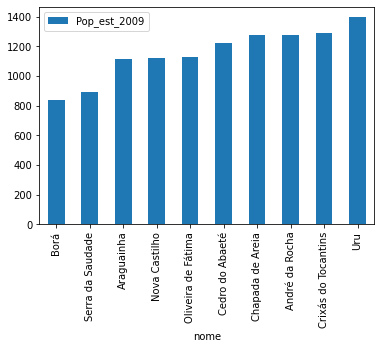

In [142]:
import matplotlib.pyplot as plt

cidades_menos_populosas_df = brasil_df.sort_values(by = ['Pop_est_2009'], ascending = True).head(n=10)[['nome', 'Pop_est_2009']]

cidades_menos_populosas_df.plot.bar(x = 'nome', y = 'Pop_est_2009')

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

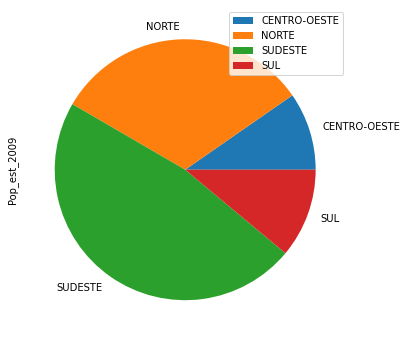

In [150]:
populacao_regioes = brasil_df.sort_values(by = ['Pop_est_2009'], ascending = True).head(n=10)[['Região', 'Pop_est_2009']]
populacao_regioes = populacao_regioes.groupby('Região').agg('sum')
populacao_regioes.plot.pie(y = 'Pop_est_2009', figsize = (11,6) )